In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading clean dataset

fl_eda = pd.read_csv('fl_delay.csv')

C:\Users\sonia\AppData\Local\Temp\ipykernel_38516\2335796957.py:3: DtypeWarning: Columns (17,18,31,34,35,36,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  fl_eda = pd.read_csv('fl_delay.csv')


In [3]:
fl_eda.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,SCHEDULED_DEPARTURE,ARRIVAL_TIME,SCHEDULED_ARRIVAL,AIRLINE,...,AIRLINE_DELAY,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,iso_region
0,0,2008,1,3,4,2003,1955,2211.0,2225,Southwest Airlines Co.,...,0.0,6523,00A,heliport,Total RF Heliport,40.070984,-74.933685,11.0,US,US-PA
1,1,2008,1,3,4,754,735,1002.0,1000,Southwest Airlines Co.,...,0.0,323361,00AA,small_airport,Aero B Ranch Airport,38.704020,-101.473910,3435.0,US,US-KS
2,2,2008,1,3,4,628,620,804.0,750,Southwest Airlines Co.,...,0.0,6524,00AK,small_airport,Lowell Field,59.947735,-151.692520,450.0,US,US-AK
3,3,2008,1,3,4,1829,1755,1959.0,1925,Southwest Airlines Co.,...,0.0,6525,00AL,small_airport,Epps Airpark,34.864800,-86.770300,820.0,US,US-AL
4,4,2008,1,3,4,1940,1915,2121.0,2110,Southwest Airlines Co.,...,0.0,506791,00AN,small_airport,Katmai Lodge Airport,59.093290,-156.456700,80.0,US,US-AK


In [4]:
fl_eda= fl_eda.drop(columns=('Unnamed: 0'), axis= 1)

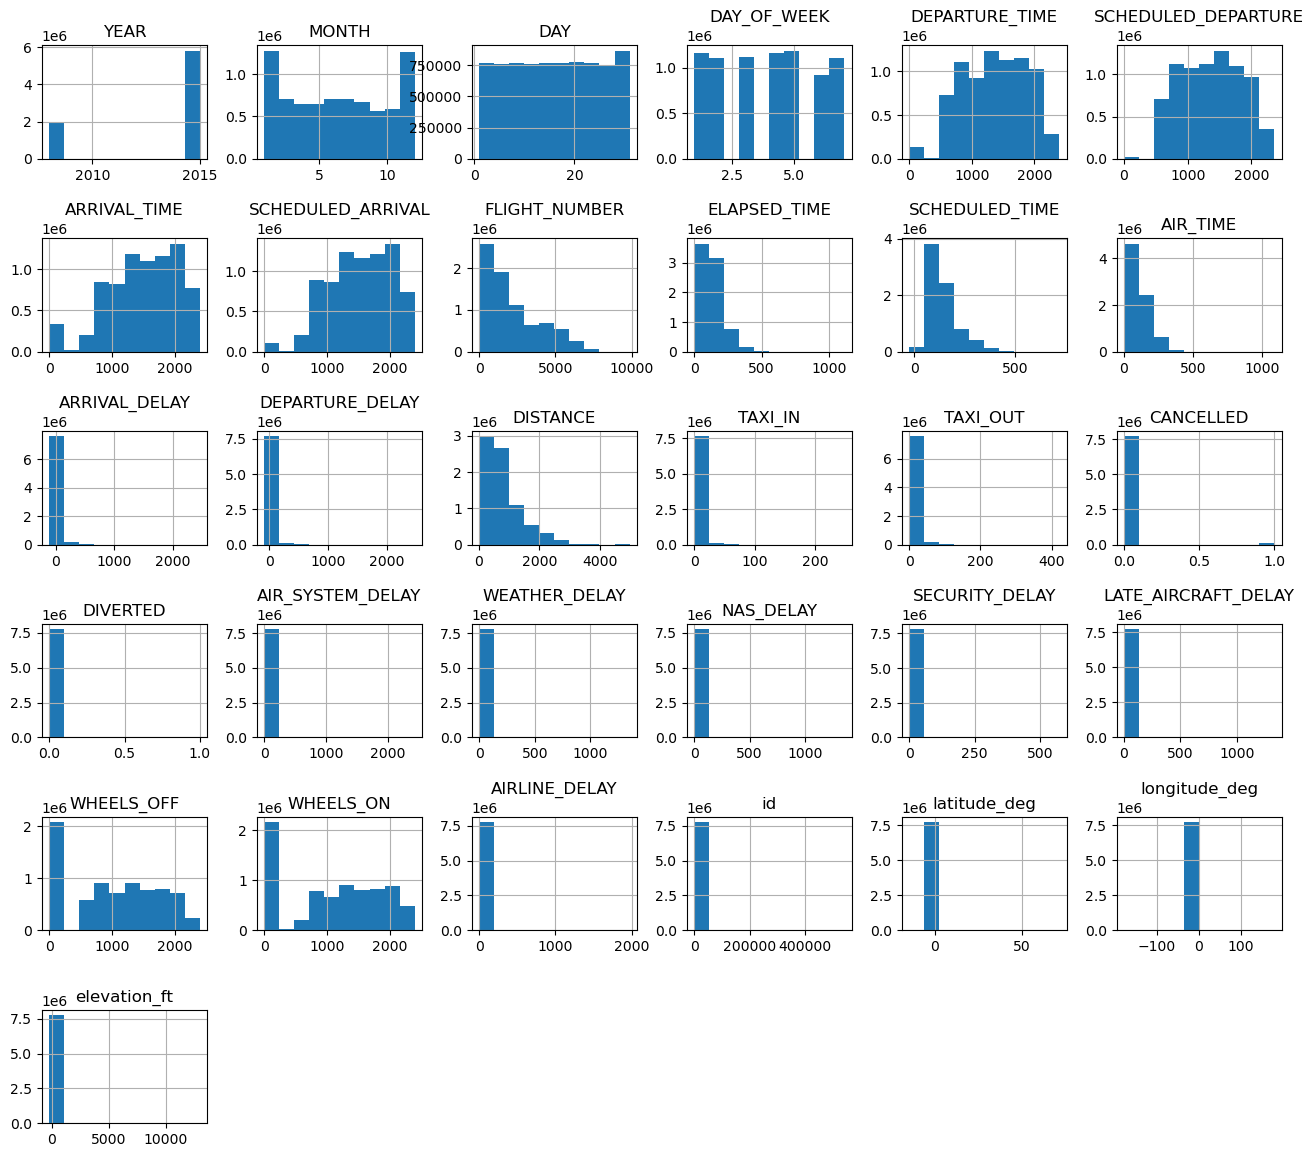

In [5]:
# Checking the distributions of features

fl_eda.hist(figsize=(16,14))
plt.subplots_adjust(hspace =0.7)

Most of the features were right skewed.

Most of the features will be explained as EDA is conducted in this notebook.

Elapsed time = Air time + Taxi in + Taxi out

Scheduled time= Scheduled flight time shown on carriers' Computerized Reservations Systems (CRS).

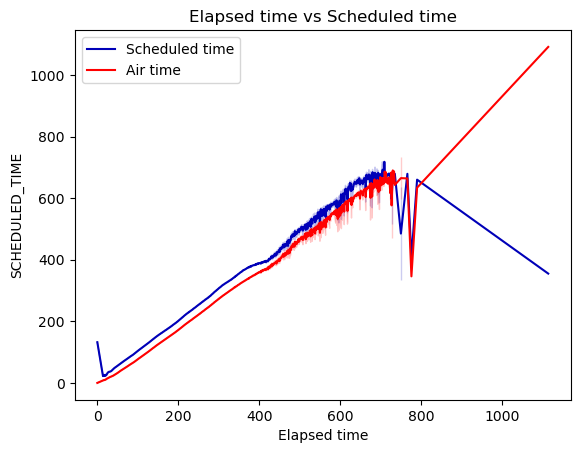

In [6]:
# Checking time discrepancies between elapsed time and scheduled time.

sns.lineplot(x='ELAPSED_TIME', y='SCHEDULED_TIME', data= fl_eda, color='#0000B8', label='Scheduled time')
sns.lineplot(x= 'ELAPSED_TIME', y='AIR_TIME', data= fl_eda, color= 'Red', label= 'Air time')
plt.title('Elapsed time vs Scheduled time')
plt.xlabel('Elapsed time')
plt.show()

From this chart it is obvious that the scheduled time amd air time does not always match the the elapsed time. 
There times when elapsed time is longer than scheduled time and air time and this is indicative of delays.
Just like the initial definition of the features, this chart proves that Air time is more correlated to elasped time than scheduled time is to elapsed time.

Wheel on time refers  to the time an aircraft touches down on the runway at the airport where as the  Wheel off time refers to the time the aircrafts wheels leave the runway of an airport.
Bringing this defination to life from this dataset, Arrival time is be compared to Wheel on time and Departure time is be compared to Wheel off time.

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

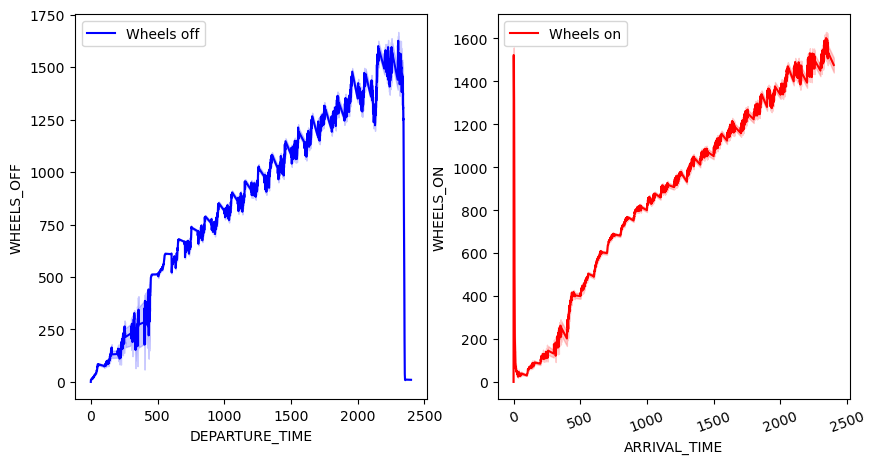

In [7]:
# Comparing arrival time to wheel on time and departure time to wheel off time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x='DEPARTURE_TIME', y='WHEELS_OFF', data= fl_eda ,ax= ax1, color= 'Blue', label= 'Wheels off')
sns.lineplot(x='ARRIVAL_TIME', y='WHEELS_ON', data= fl_eda, ax=ax2, color= 'Red', label='Wheels on')
plt.xticks(rotation=20)


**Wheels off**

Wheels off time is usually a few minutes before departure time. This is a relistic finding because the departure time usually set after to the time after the aircraft tyres leaves the airport and this time comes later than the time the tyres of the aircraft leaves the airports runway.
However, from the line plot, as departure time increases, wheels off time tends to decrease . This may be due to the length of the airports runways due to the airports elevation from ground or the size of the airport. Aircraft wheels may leave the runway but still be in the vicinity of the airport.

**Wheels on**

From the second lineplot, initial wheels on time is hours ahead of arrival time when the plane is stationary.As arrival time increases however, wheels on time lags.  This is because the arrival time is calculated as the time the aircrafts gets to the gate, so the wheels touch the runway first and them the plane moves to the gate.Depending on the distance from the runway to the gate, the time difference between the wheels on time and arrival will be more. 

These two graphs indicate that wheels off and wheel on times is not the same as departure and arrival time.

Text(0.5, 1.0, 'Year vrs wheels on and wheels off')

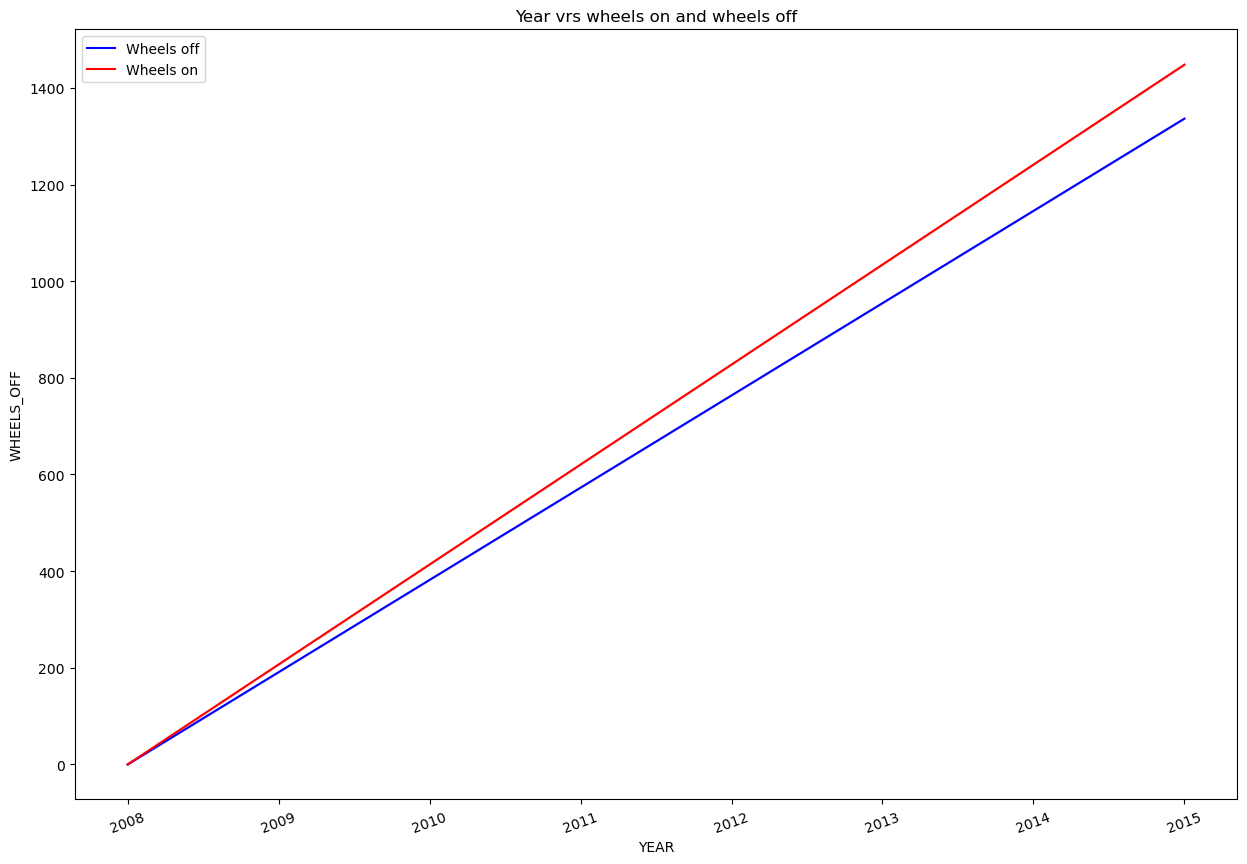

In [8]:
# Year vs wheels on and wheels off

plt.figure(figsize=(15,10))
sns.lineplot(x= 'YEAR', y= 'WHEELS_OFF', data= fl_eda ,color= 'Blue', label= 'Wheels off')
sns.lineplot(x= 'YEAR', y= 'WHEELS_ON', data= fl_eda, color= 'Red', label='Wheels on')
plt.xticks(rotation=20)
plt.title("Year vrs wheels on and wheels off")

Wheels off and wheels on time increased in 2015, but wheels off time increased more than wheels on time

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

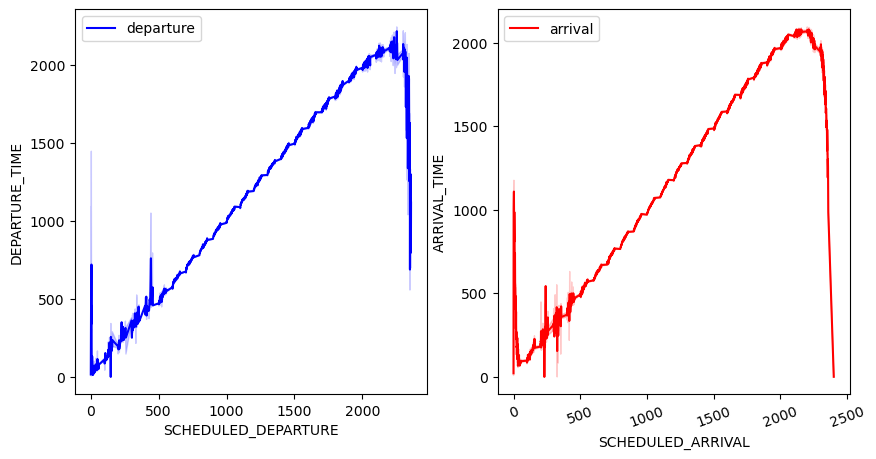

In [10]:
# Checking if departure time matches scheduled departure and arrival time matches scheduled arrival

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_TIME', data= fl_eda ,ax= ax1, color= 'Blue', label= 'departure')
sns.lineplot(x='SCHEDULED_ARRIVAL', y='ARRIVAL_TIME', data= fl_eda, ax=ax2, color= 'Red', label='arrival')
plt.xticks(rotation=20)

These charts indicate that the scheduled times do not correspond to the real times. 

Text(0.5, 1.0, 'Arrival delay vrs departure delay')

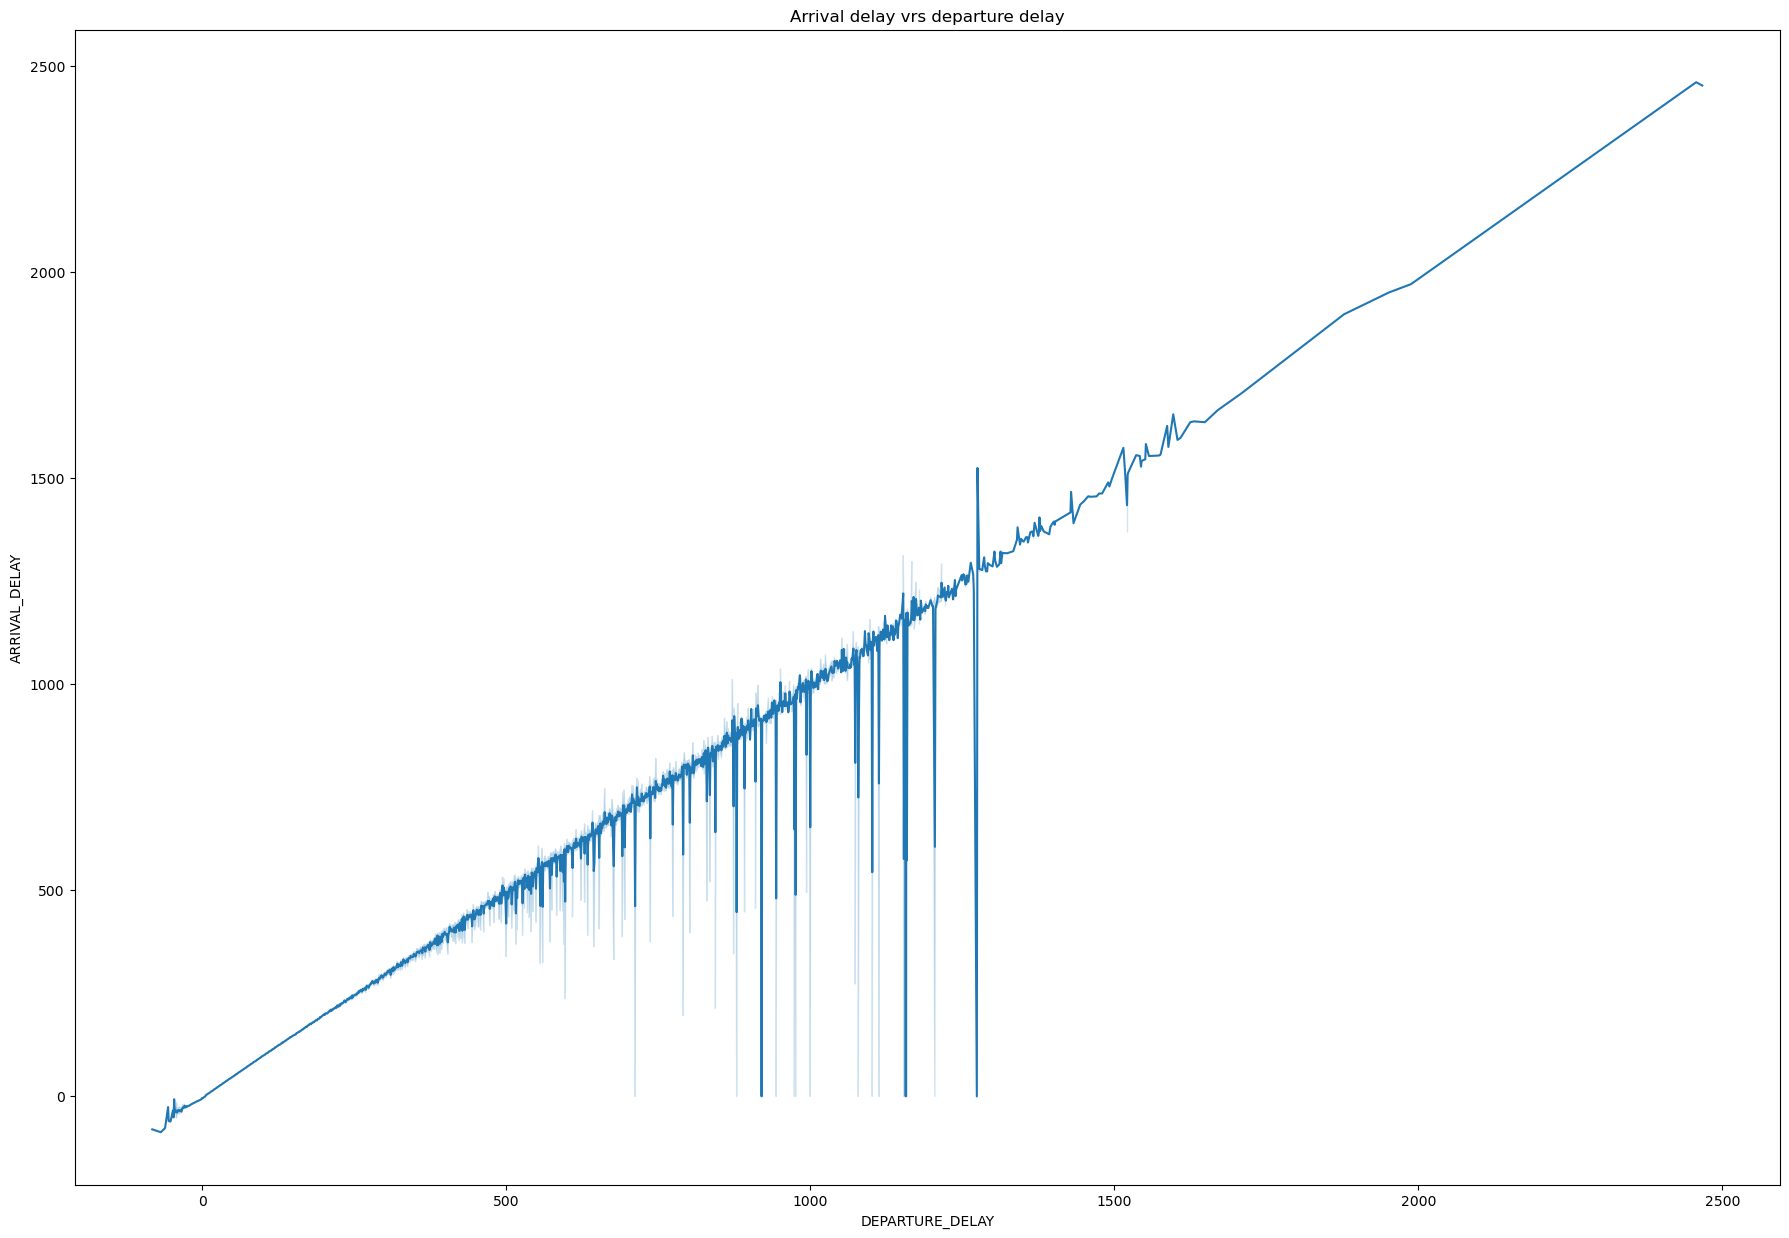

In [11]:
# Finding if arrival delay affects departure delay as suspected.

plt.figure(figsize=(22,15))
sns.lineplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data= fl_eda)
plt.title("Arrival delay vrs departure delay")

Arrival delay is positively correlated to departure delay. However, arrival delays are not always a consequence of departure delays and vice versa.

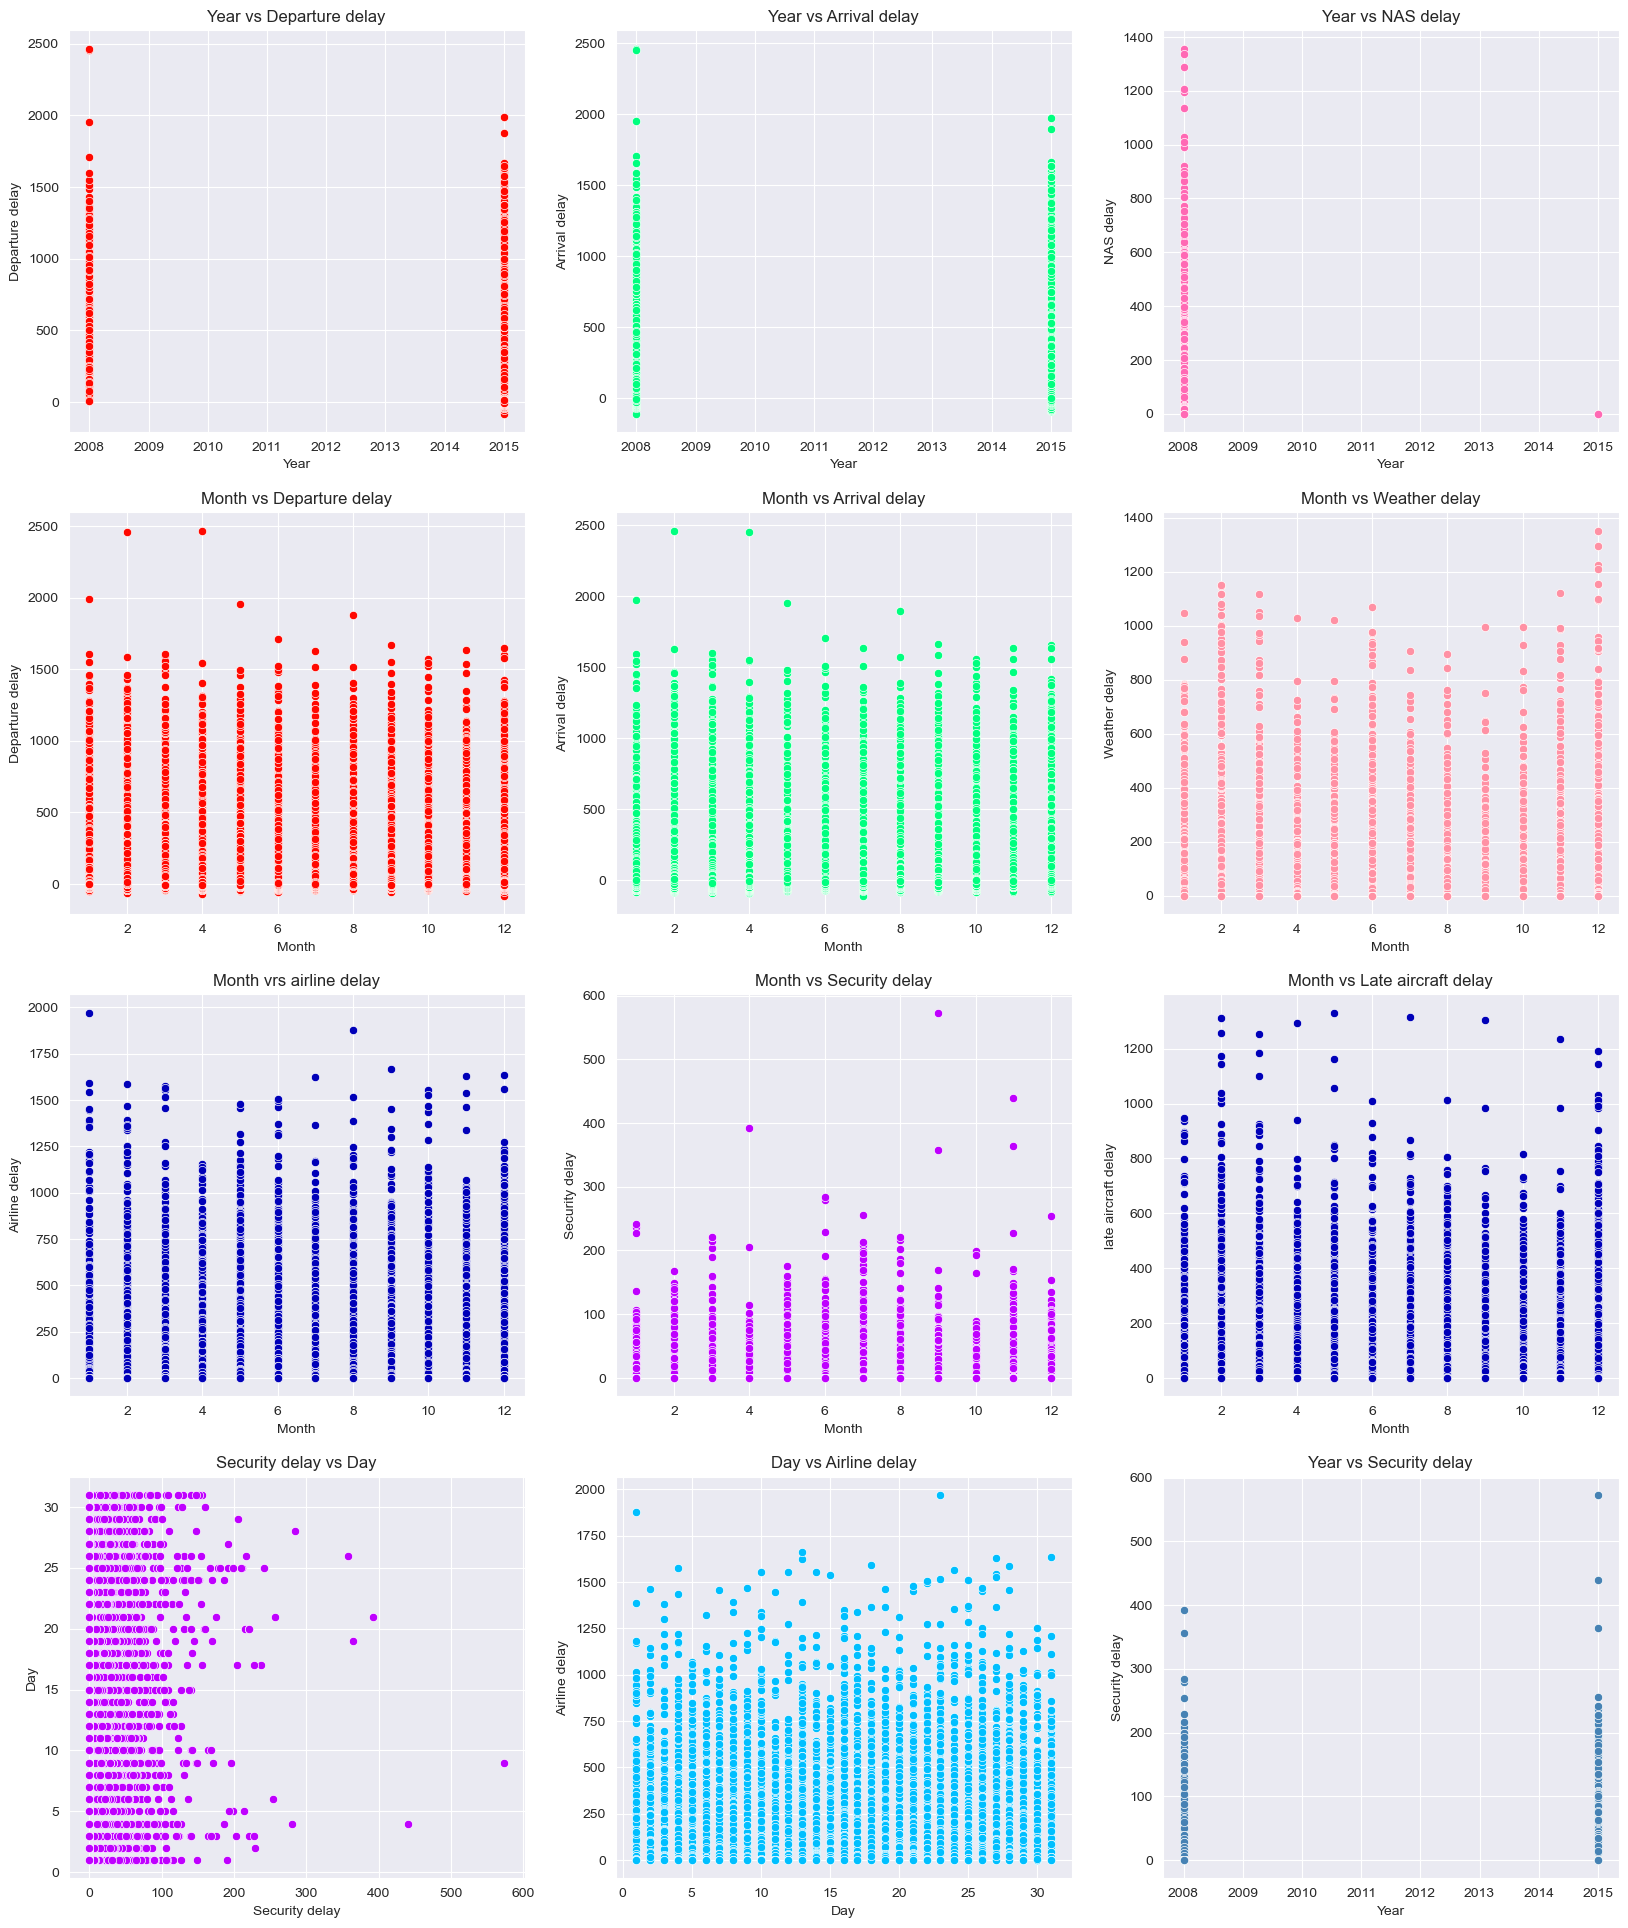

In [12]:
# Times delays were observed

sns.set_style('darkgrid')

# Create a 3x4 subplot grid
fig, axs = plt.subplots(4, 3, figsize=(20, 24))

# Scatter plot for each pair of informative columns
sns.scatterplot(x='YEAR', y='DEPARTURE_DELAY', data= fl_eda, ax=axs[0, 0], color='#FF0800')
axs[0, 0].set_title('Year vs Departure delay')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Departure delay')

sns.scatterplot(x='YEAR', y='ARRIVAL_DELAY', data= fl_eda, ax=axs[0, 1], color='#00FF7F')
axs[0, 1].set_title('Year vs Arrival delay')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Arrival delay')

sns.scatterplot(x='YEAR', y='NAS_DELAY', data= fl_eda, ax=axs[0, 2], color='#FF69B4')
axs[0, 2].set_title('Year vs NAS delay')
axs[0, 2].set_xlabel('Year')
axs[0, 2].set_ylabel('NAS delay')

sns.scatterplot(x='MONTH', y='DEPARTURE_DELAY', data= fl_eda, ax=axs[1, 0], color='#FF0800')
axs[1, 0].set_title('Month vs Departure delay')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Departure delay')

sns.scatterplot(x='MONTH', y='ARRIVAL_DELAY', data= fl_eda, ax=axs[1, 1], color='#00FF7F')
axs[1, 1].set_title('Month vs Arrival delay')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Arrival delay')

sns.scatterplot(x='MONTH', y='WEATHER_DELAY', data= fl_eda, ax=axs[1, 2], color='#FF91A4')
axs[1, 2].set_title('Month vs Weather delay')
axs[1, 2].set_xlabel('Month')
axs[1, 2].set_ylabel('Weather delay')

sns.scatterplot(x='MONTH', y='AIRLINE_DELAY', data= fl_eda, ax=axs[2, 0], color= '#0000B8')
axs[2, 0].set_title('Month vrs airline delay')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Airline delay')

sns.scatterplot(x='MONTH', y='SECURITY_DELAY', data= fl_eda, ax=axs[2, 1], color='#BF00FF')
axs[2, 1].set_title('Month vs Security delay')
axs[2, 1].set_xlabel('Month')
axs[2, 1].set_ylabel('Security delay')

sns.scatterplot(x='MONTH', y='LATE_AIRCRAFT_DELAY', data= fl_eda, ax=axs[2, 2], color='#0000B8')
axs[2, 2].set_title('Month vs Late aircraft delay')
axs[2, 2].set_xlabel('Month')
axs[2, 2].set_ylabel('late aircraft delay')

sns.scatterplot(y='DAY', x='SECURITY_DELAY', data= fl_eda, ax=axs[3, 0], color='#BF00FF')
axs[3, 0].set_title('Security delay vs Day')
axs[3, 0].set_ylabel('Day')
axs[3, 0].set_xlabel('Security delay')

sns.scatterplot(x='DAY', y='AIRLINE_DELAY', data= fl_eda, ax=axs[3, 1], color='#00BFFF')
axs[3, 1].set_title('Day vs Airline delay')
axs[3, 1].set_xlabel('Day')
axs[3, 1].set_ylabel('Airline delay')

sns.scatterplot(x='YEAR', y='SECURITY_DELAY', data= fl_eda, ax=axs[3, 2],color='#4682B4')
axs[3, 2].set_title('Year vs Security delay')
axs[3, 2].set_xlabel('Year')
axs[3, 2].set_ylabel('Security delay')                    

plt.show()


From these charts, it is evident that:

1. More departure delays and arrival delays were recorded in 2008 than in 2015.
2. Nas_delays were observed mostly in 2008. Delays that are within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume and air traffic control.
4. February and April were the months that recorded longest Departure delays and arrival delays.This may be because more passengers were returning from new year celebrations and in April passengers were going on summer holidays.
5. Long weather delays were experienced in December because its winter season
6. Long airline delays were observed on January and August.
7. Long security delays were observed on September, 9th
8. Late aircraft delays were observed on almost all months except January.
9. Security delays were commonly oberved in 2015 than in 2008

<function matplotlib.pyplot.show(close=None, block=None)>

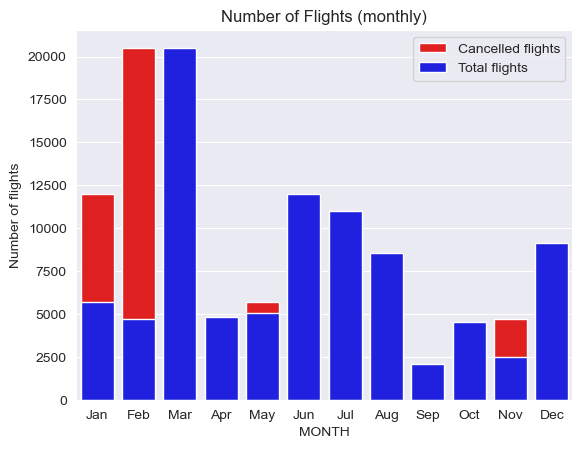

In [13]:
# Number of monthly cancelled flights


fl_df = fl_eda[fl_eda.CANCELLED==1]['MONTH'].value_counts().reset_index().sort_values(by= 'MONTH')
fl_df.columns = ['MONTH', 'FLIGHT_NUMBER']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
fl_df.MONTH = fl_df.MONTH.map(month)
ax= sns.barplot(x= fl_df.MONTH, y=fl_df.FLIGHT_NUMBER, color='Red',label= 'Cancelled flights')
plt.title('Number of Cancelled Flights (monthly)') 
plt.ylabel ( 'Number of flights')

                                                          
fl_month = fl_eda.MONTH.value_counts().reset_index().sort_values(by= 'MONTH')
fl_month.columns = ['MONTH', 'FLIGHT_NUMBER']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
fl_month.MONTH = fl_month.MONTH.map(month)
ax= sns.barplot(x= fl_month.MONTH, y=fl_df.FLIGHT_NUMBER,color='Blue', label= 'Total flights')
plt.title('Number of Flights (monthly)') 
plt.ylabel ('Number of flights')


plt.legend(loc='best')
plt.show

More flights were cancelled in November, January and February. This may be due to harsh winter weather conditions.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'American Eagle Airlines Inc.'),
  Text(1, 0, 'Atlantic Southeast Airlines'),
  Text(2, 0, 'Spirit Air Lines'),
  Text(3, 0, 'Skywest Airlines Inc.'),
  Text(4, 0, 'US Airways Inc.'),
  Text(5, 0, 'JetBlue Airways'),
  Text(6, 0, 'American Airlines Inc.'),
  Text(7, 0, 'United Air Lines Inc.'),
  Text(8, 0, 'Southwest Airlines Co.'),
  Text(9, 0, 'Virgin America'),
  Text(10, 0, 'Frontier Airlines Inc.'),
  Text(11, 0, 'Delta Air Lines Inc.'),
  Text(12, 0, 'Alaska Airlines Inc.'),
  Text(13, 0, 'Hawaiian Airlines Inc.'),
  Text(14, 0, '9E'),
  Text(15, 0, 'YV'),
  Text(16, 0, 'XE'),
  Text(17, 0, 'CO'),
  Text(18, 0, 'OH'),
  Text(19, 0, 'NW'),
  Text(20, 0, 'FL'),
  Text(21, 0, 'AQ')])

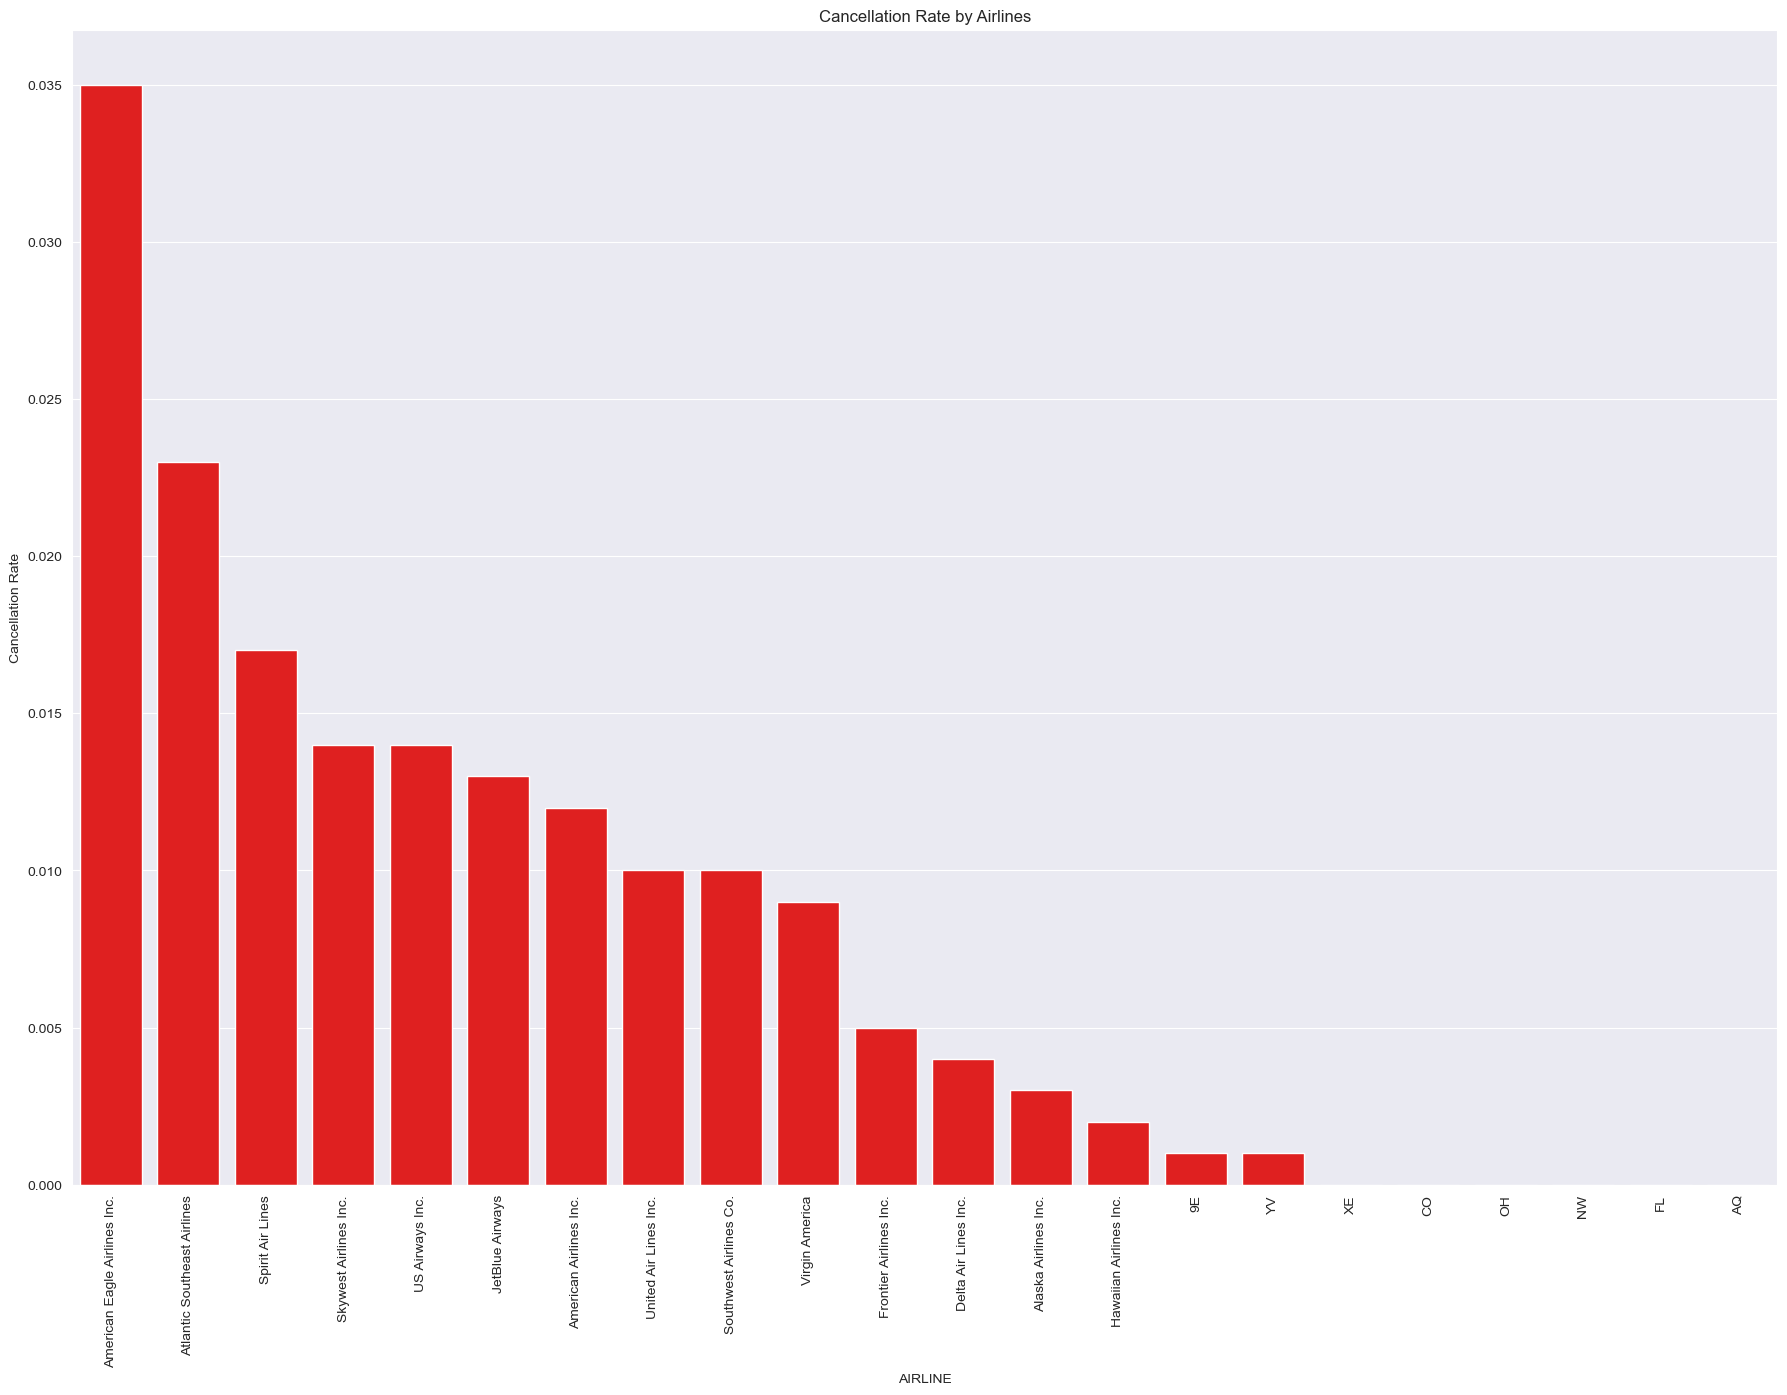

In [14]:
# Cancellation rate of airlines

fl_airline = fl_eda.groupby('AIRLINE')['CANCELLED'].mean().sort_values(ascending = False).round(3)

plt.figure(figsize=(22,15))
sns.barplot(x= fl_airline.index, y= fl_airline, color = 'Red')
plt.title('Cancellation Rate by Airlines')
plt.ylabel ('Cancellation Rate')
plt.xticks(rotation= 90)
                                                       

American Eagle Airlines Inc has the highest rate of cancelled flights. About 3.5% of flights from this airline company were cancelled.

Text(0, 0.5, 'Count')

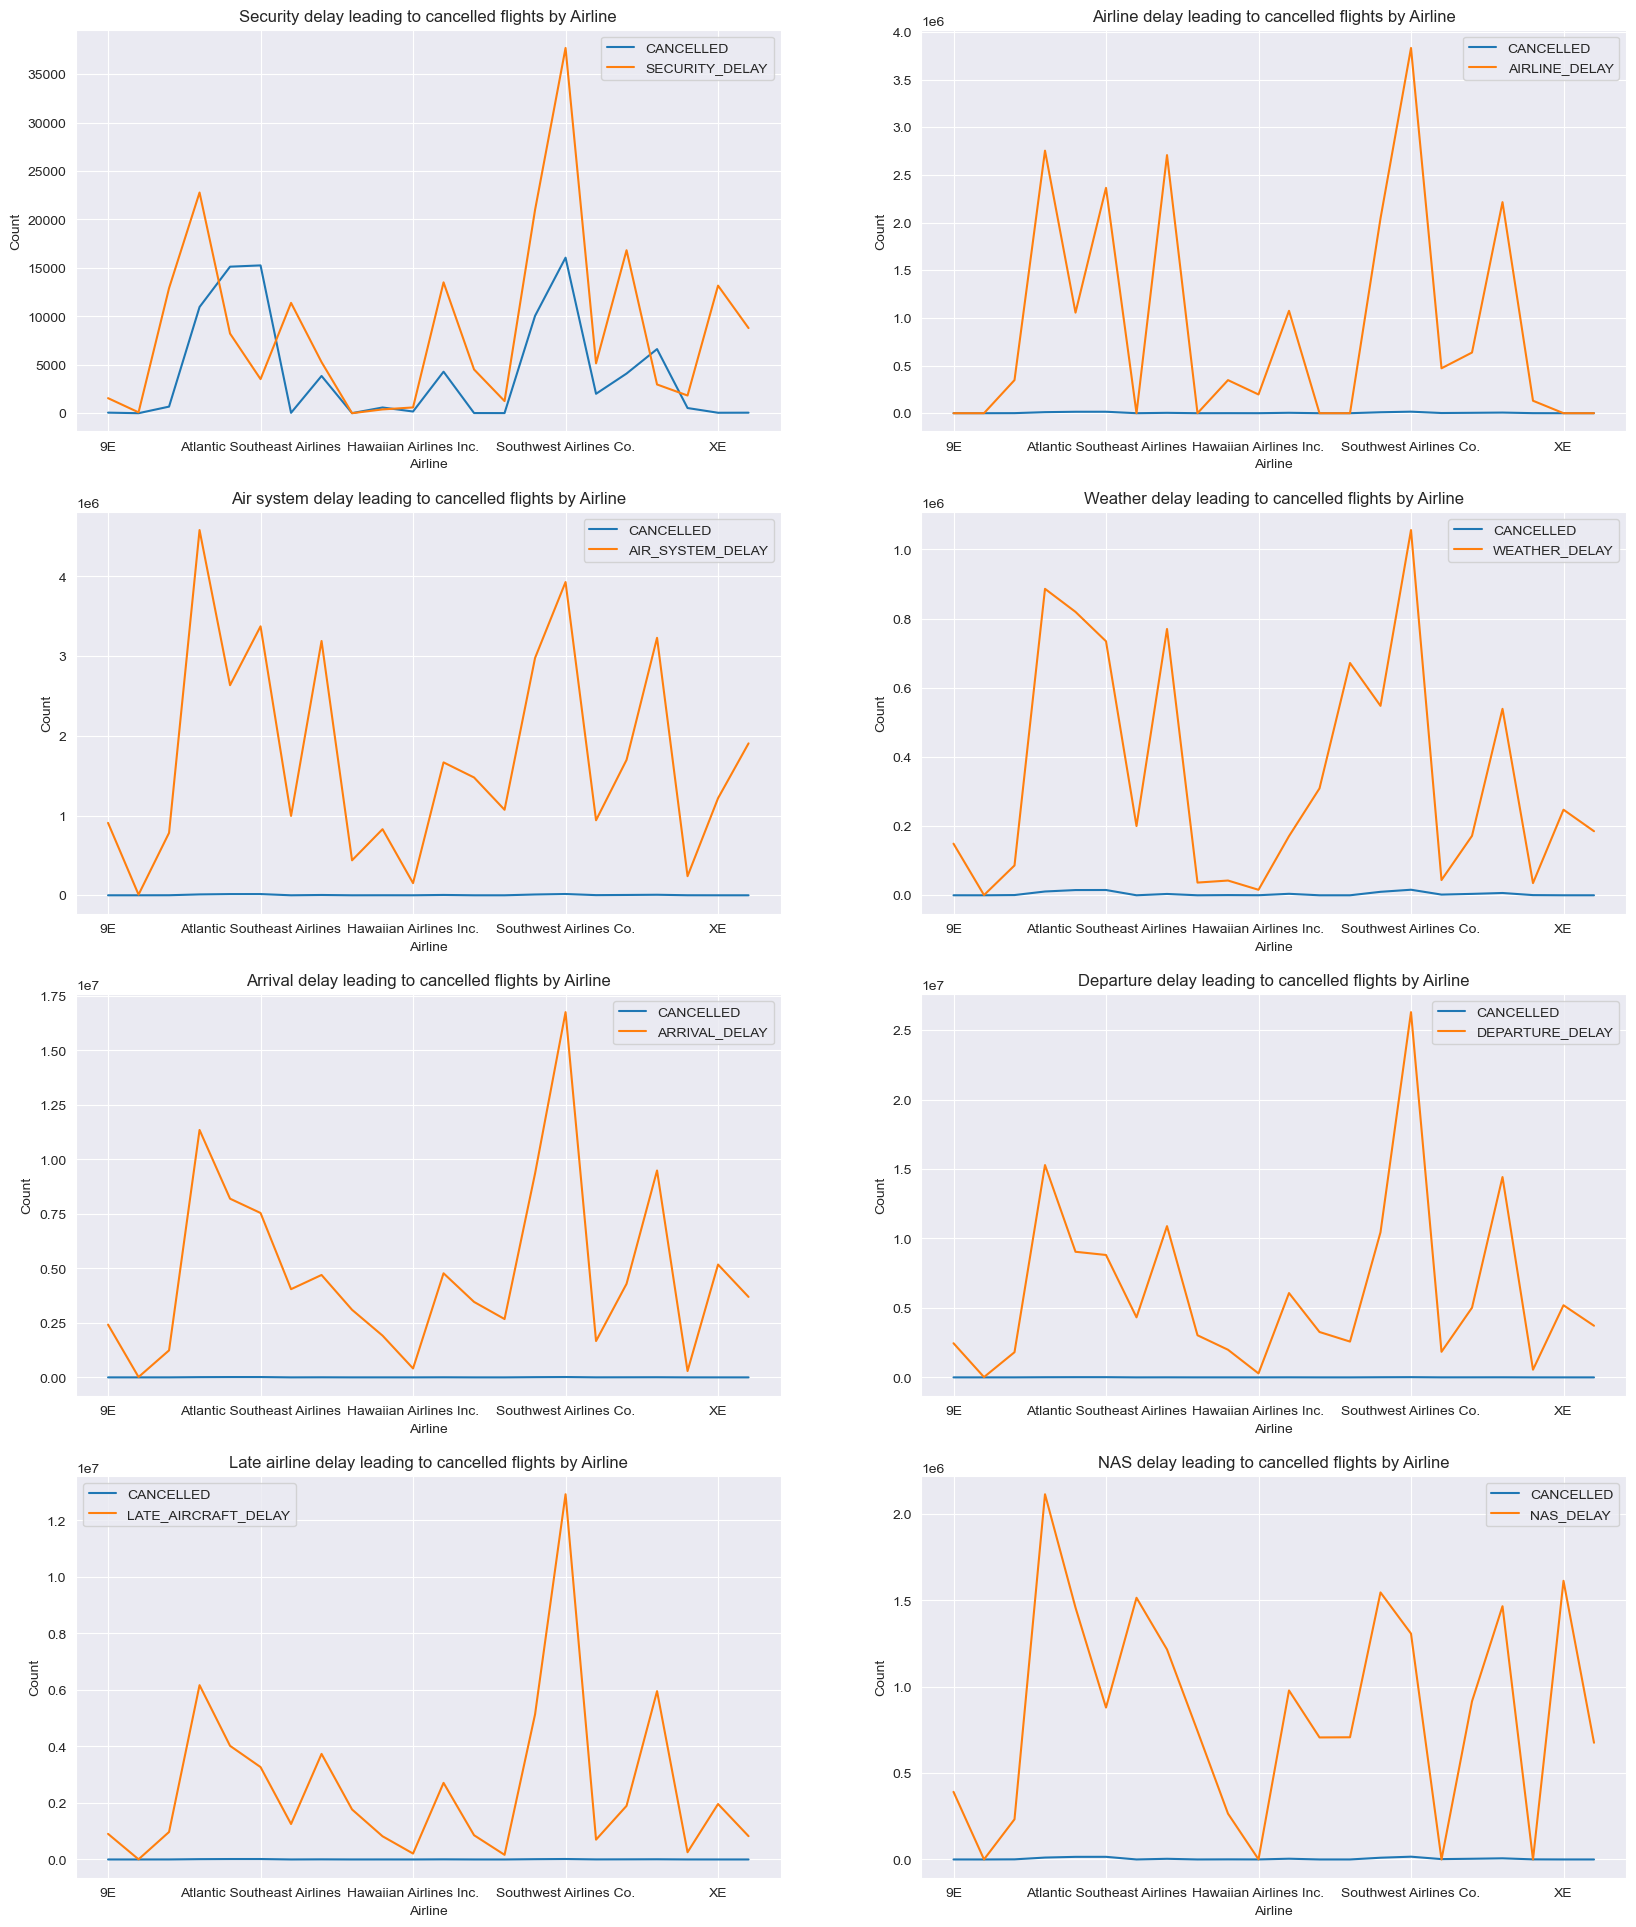

In [15]:
# Delays that led to flight cancellation

sns.set_style('darkgrid')

# Create a 3x4 subplot grid
fig, axs = plt.subplots(4, 2, figsize=(20, 24))

SECURITY = fl_eda.groupby("AIRLINE")[["CANCELLED","SECURITY_DELAY"]].sum()

SECURITY.plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Security delay leading to cancelled flights by Airline')
axs[0, 0].set_xlabel('Airline')
axs[0, 0].set_ylabel('Count')


AIRLINE= fl_eda.groupby("AIRLINE")[["CANCELLED", 'AIRLINE_DELAY']].sum()

AIRLINE.plot(kind='line', ax= axs[0, 1])
axs[0, 1].set_title('Airline delay leading to cancelled flights by Airline')
axs[0, 1].set_xlabel('Airline')
axs[0, 1].set_ylabel('Count')


AIR = fl_eda.groupby("AIRLINE")[["CANCELLED", 'AIR_SYSTEM_DELAY']].sum()

AIR.plot(kind='line', ax= axs[1, 0])
axs[1, 0].set_title('Air system delay leading to cancelled flights by Airline')
axs[1, 0].set_xlabel('Airline')
axs[1, 0].set_ylabel('Count')


WEATHER= fl_eda.groupby("AIRLINE")[["CANCELLED", 'WEATHER_DELAY']].sum()

WEATHER.plot(kind='line',ax= axs[1, 1])
axs[1, 1].set_title('Weather delay leading to cancelled flights by Airline')
axs[1, 1].set_xlabel('Airline')
axs[1, 1].set_ylabel('Count')


ARRIVAL= fl_eda.groupby("AIRLINE")[["CANCELLED", 'ARRIVAL_DELAY']].sum()

ARRIVAL.plot(kind='line',ax=axs[2, 0])
axs[2, 0].set_title('Arrival delay leading to cancelled flights by Airline')
axs[2, 0].set_xlabel('Airline')
axs[2, 0].set_ylabel('Count')


DEPARTURE= fl_eda.groupby("AIRLINE")[["CANCELLED", 'DEPARTURE_DELAY']].sum()

DEPARTURE.plot(kind='line',ax=axs[2, 1])
axs[2, 1].set_title('Departure delay leading to cancelled flights by Airline')
axs[2, 1].set_xlabel('Airline')
axs[2, 1].set_ylabel('Count')


LATE = fl_eda.groupby("AIRLINE")[["CANCELLED", 'LATE_AIRCRAFT_DELAY']].sum()

LATE.plot(kind='line',ax=axs[3, 0])
axs[3, 0].set_title('Late airline delay leading to cancelled flights by Airline')
axs[3, 0].set_xlabel('Airline')
axs[3, 0].set_ylabel('Count')


NAS = fl_eda.groupby("AIRLINE")[["CANCELLED", 'NAS_DELAY']].sum()

NAS.plot(kind='line',ax=axs[3, 1])
axs[3, 1].set_title('NAS delay leading to cancelled flights by Airline')
axs[3, 1].set_xlabel('Airline')
axs[3, 1].set_ylabel('Count')


 

Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas. This type of delay was more likely to cause flight cancellation than any other delay.

Weather delays were also more likely to cause flight cancellatons.

In [ ]:
# The most visited origin airport

count = fl_eda.ORIGIN_AIRPORT.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10], color= '#002366')
plt.xticks(rotation=20)
plt.ylabel("Number of times origin airport is visited")
plt.title("First 10 most visited Origin airport")

Airports with high elevation affects airline performance in may ways. The increased elevation means these airports have increased run way distances which also means increased landing distances due to reduced air density. This property of airports makes it difficult for landing and takeoff and may leads to departure delays and arrival delays. Pilots must carefully calculate takeoff and landing distances as well as adjust their approach and departure procedures to ensure safe operations at high elevation airports.

This single feature of airports may affect wheel off, wheel on, taxi on and taxi off times leading to departure delays and arrival delays. 


In [16]:
# Finding origin airports with high elevation

airport_elevation= fl_eda[["name","elevation_ft"]]
ele_=airport_elevation.sort_values(by='elevation_ft', ascending= True)
elevation= ele_[0:10]

Text(0.5, 1.0, 'First 10 airports with the highest elevation')

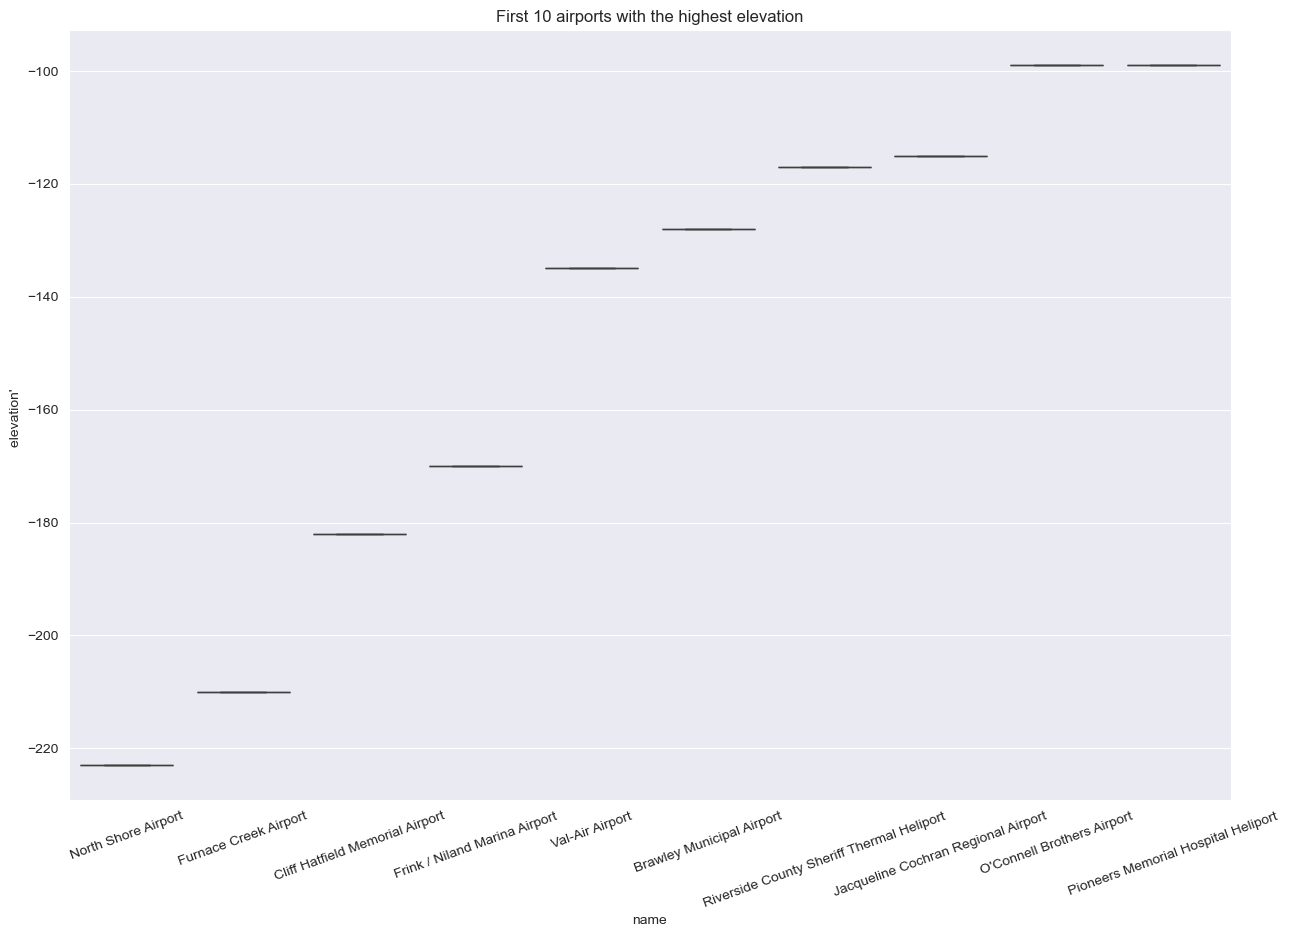

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x= 'name', y= 'elevation_ft', data= elevation)
plt.xticks(rotation=20)
plt.ylabel("elevation' ")
plt.title("First 10 airports with the highest elevation")

Pioneers Memorial Hospital Heliport has the highest elevation in the dataset.

Text(0.5, 1.0, 'First 10 most visited destination airport')

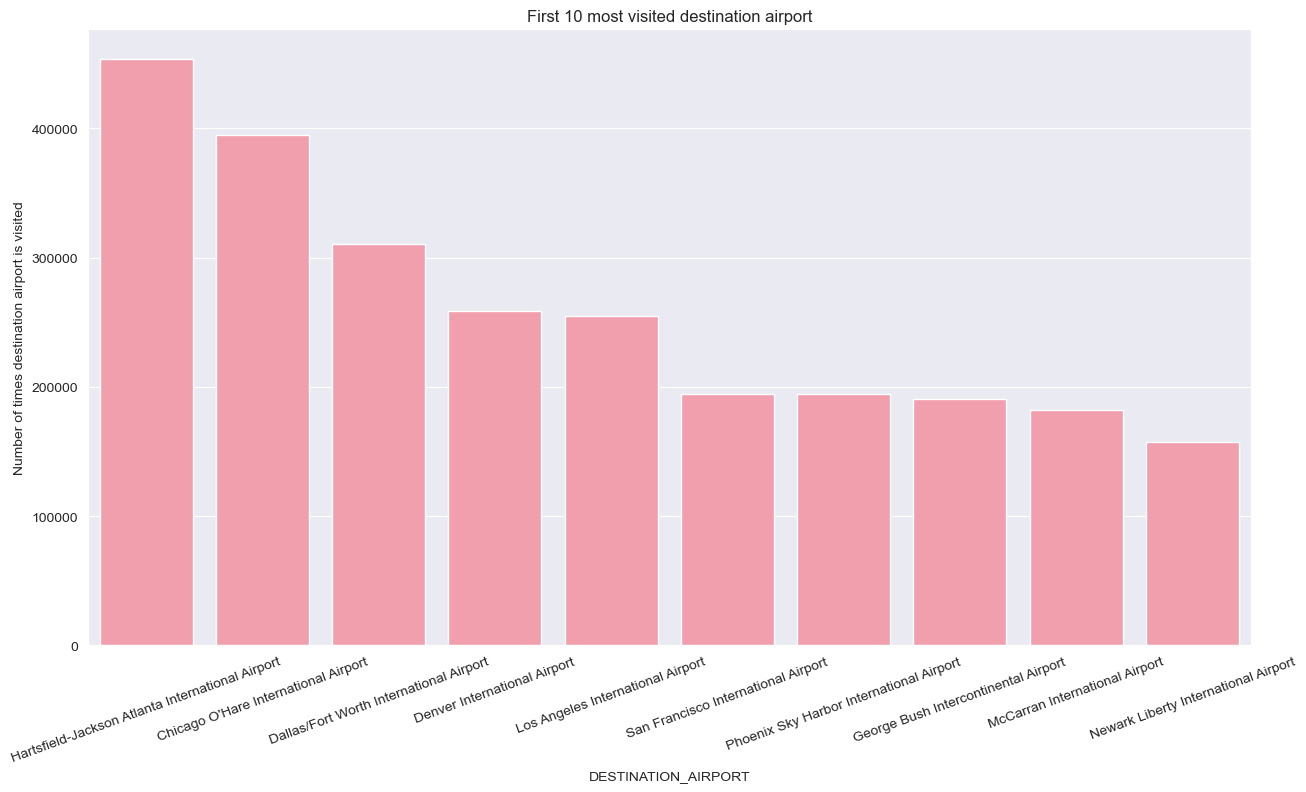

In [18]:
# The most visited destination airports

count = fl_eda.DESTINATION_AIRPORT.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10], color='#FF91A4')
plt.xticks(rotation=20)
plt.ylabel("Number of times destination airport is visited")
plt.title("First 10 most visited destination airport")

The most visted airport is the Hartsfield-Jackson Atlanta International Airport.


Visualising delays caused by airlines like the air system delays, airline delays,late aircraft delays, NAS_ delay,departure delay, diverted and arrival delays.

<Axes: title={'center': 'Airline_delay vrs Airline'}, xlabel='Airline_delay', ylabel='Airline'>

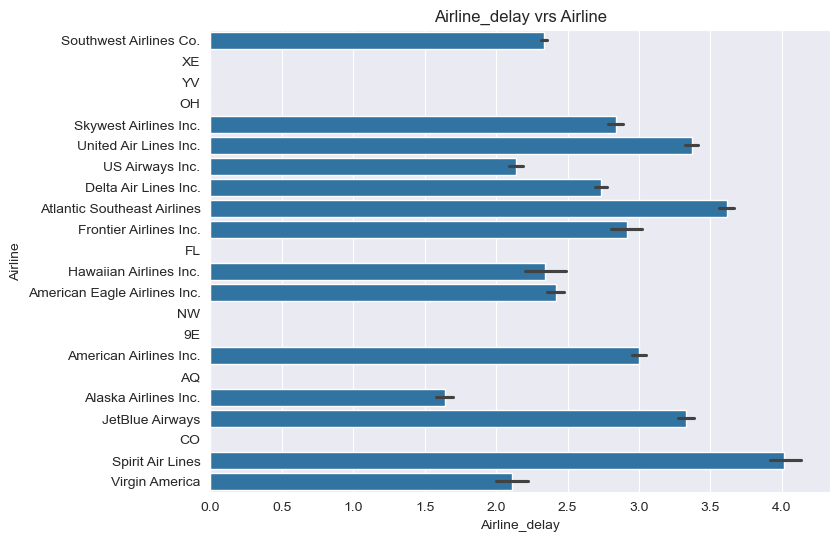

In [19]:
# Airline_delay vs delay

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('Airline_delay vrs Airline')
plt.ylabel('Airline')
plt.xlabel('Airline_delay')
sns.barplot(x='AIRLINE_DELAY',y='AIRLINE', data= fl_eda)

Virgin America Airlines had more airline delays whereas Alaska airline has less airline delays

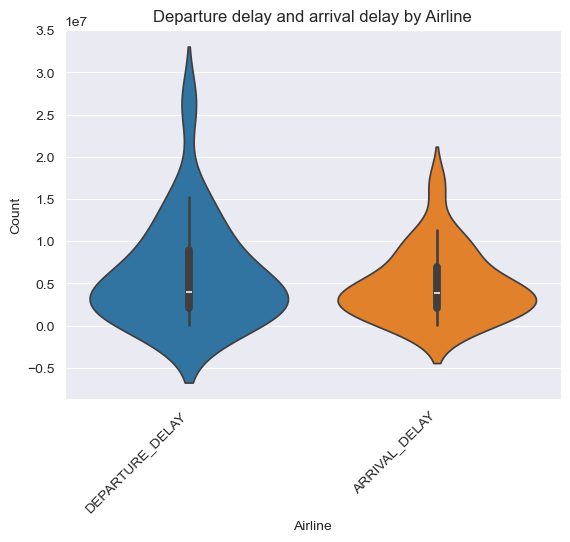

In [20]:
# Comparing depature delays to arrival delays by airlines

airline_delay= fl_eda.groupby("AIRLINE")[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].sum()
sns.violinplot(data=airline_delay)
plt.title('Departure delay and arrival delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()             


Airline departure delays lasts longer than airline arrival delays. Airline arrival delays were however more common than airline departure delays.

<Axes: title={'center': 'late aircraft delay vrs Airline'}, xlabel='late aircraft delay', ylabel='Airline'>

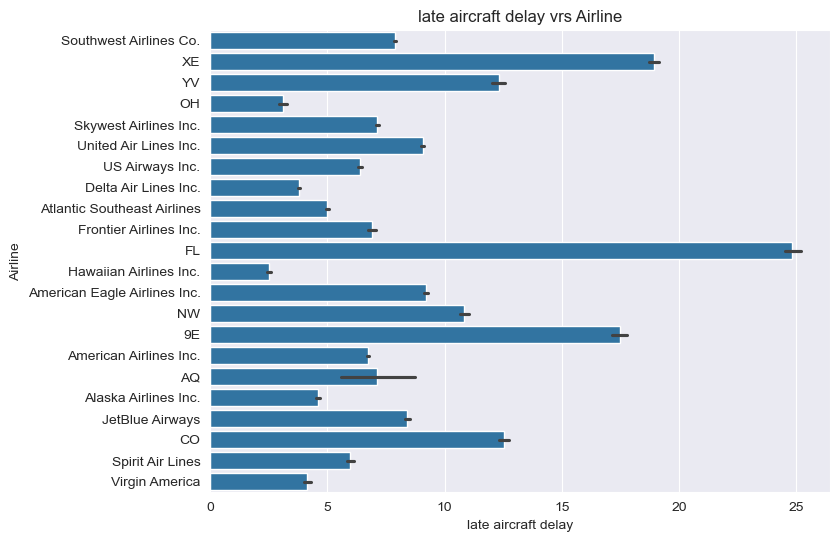

In [21]:
# Airlines vs late aircraft delay

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('late aircraft delay vrs Airline')
plt.ylabel('Airline')
plt.xlabel('late aircraft delay')
sns.barplot(x='LATE_AIRCRAFT_DELAY',y='AIRLINE', data= fl_eda)

Late Aircraft delay is an arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

From the chart FL airlines has the most late aircraft delay whereas Hawaiian Airlines Inc has the least late aircraft delay.


Text(0, 0.5, 'Count')

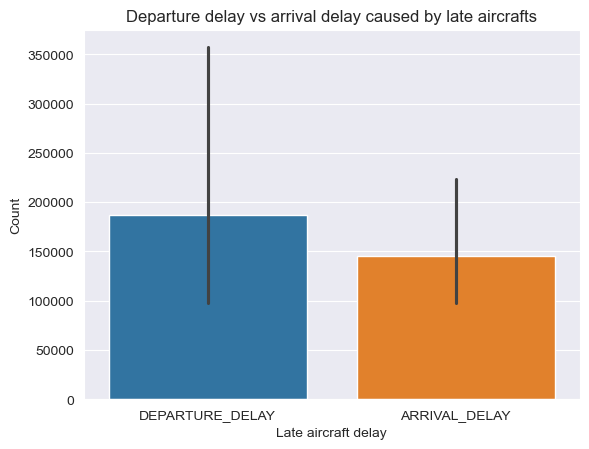

In [22]:
# Checking the effects of late aircraft delay on departure and arrival delay

late_air = fl_eda.groupby("LATE_AIRCRAFT_DELAY")[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].sum()
sns.barplot(data= late_air)
plt.title('Departure delay vs arrival delay caused by late aircrafts')
plt.xlabel('Late aircraft delay')
plt.ylabel('Count')

Late aircraft delays were responsible for about 200,000 departure delays and about 150,000 arrival delays.

<Axes: title={'center': 'Air_system_delay vrs Airline'}, xlabel='Air_system_delay', ylabel='Airline'>

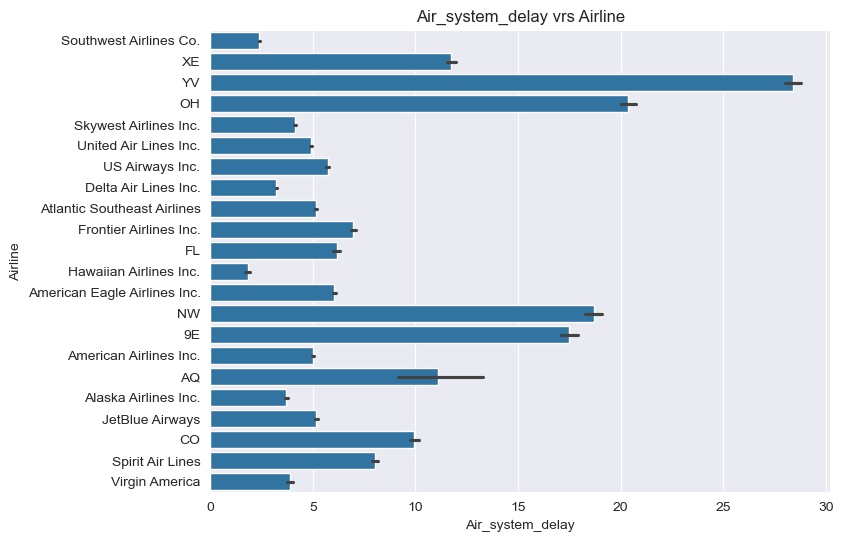

In [23]:
# Airlines vs Air system delay

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('Air_system_delay vrs Airline')
plt.ylabel('Airline')
plt.xlabel('Air_system_delay')
sns.barplot(x='AIR_SYSTEM_DELAY',y='AIRLINE', data= fl_eda)

The airline with the most Air system delays was YV.Hawaiian Airlines Inc had the least air system delay.

Text(0, 0.5, 'Count')

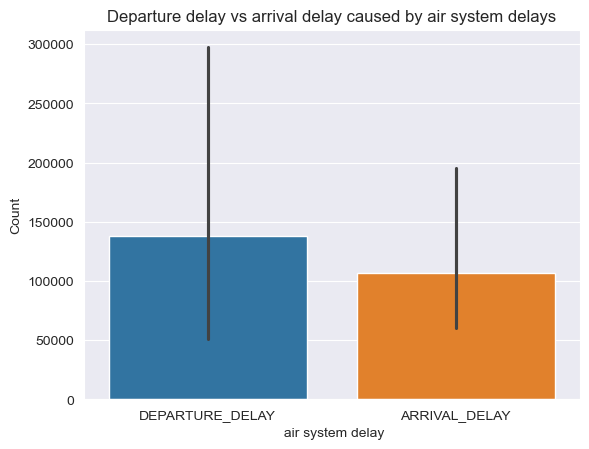

In [24]:
# Checking the effects of air system delay on departure and arrival delay

air_sys = fl_eda.groupby("AIR_SYSTEM_DELAY")[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].sum()
sns.barplot(data= air_sys)
plt.title('Departure delay vs arrival delay caused by air system delays')
plt.xlabel(' air system delay')
plt.ylabel('Count')

Air system delays were responsible for about 140,000 departure delays abd 100,000 arrival delays.

<Axes: title={'center': 'DIVERTED vrs Airline'}, xlabel='Diverted', ylabel='Airline'>

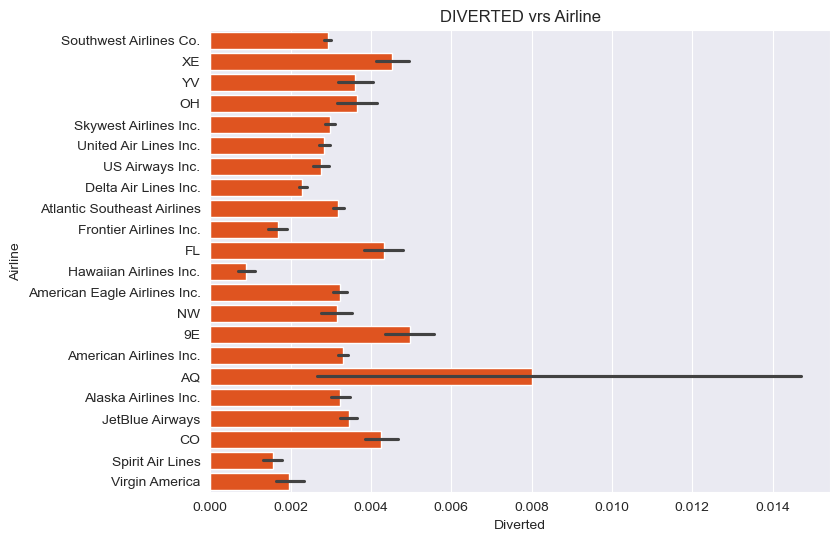

In [25]:
# Airline vs diverted airlines

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('DIVERTED vrs Airline')
plt.xlabel('Diverted')
plt.ylabel('Airline')
sns.barplot(x='DIVERTED',y='AIRLINE', data= fl_eda, color= '#FF4500')

AQ airlines has the most diverted flights where as Hawaiian Airlines Inc were the least diverted flights.

Text(0, 0.5, 'Count')

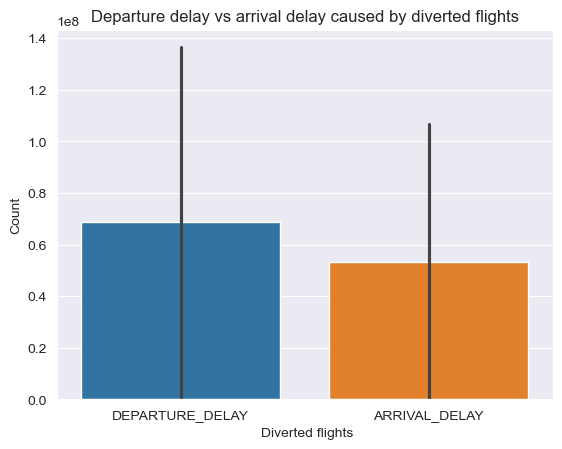

In [26]:
# Checking the effects of diverted flights on departure and arrival delay

div_ = fl_eda.groupby("DIVERTED")[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].sum()
sns.barplot(data= div_)
plt.title('Departure delay vs arrival delay caused by diverted flights')
plt.xlabel(' Diverted flights')
plt.ylabel('Count')

Diverted flights mostly cause departure delays 

Text(0.5, 1.0, 'The most used Airline')

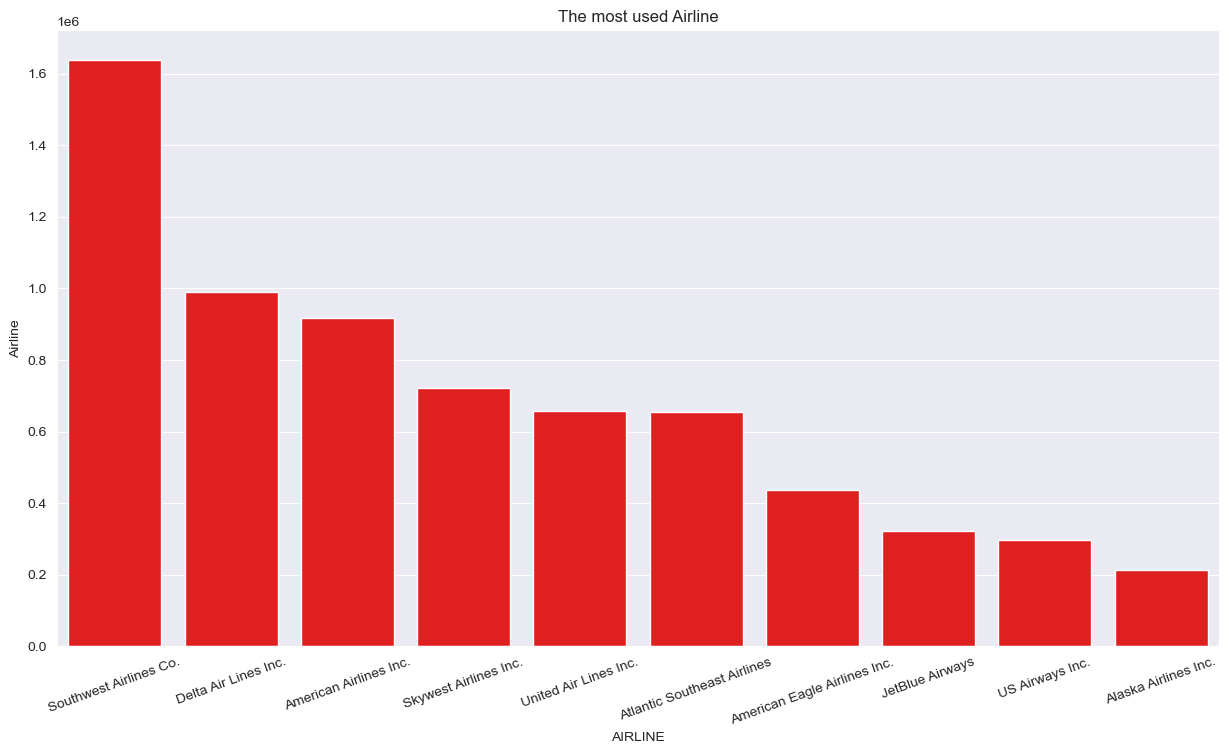

In [27]:
# Most used airline

count = fl_eda.AIRLINE.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10], color= 'Red')
plt.xticks(rotation=20)
plt.ylabel("Airline")
plt.title("The most used Airline")

Southwest Airlines Co. has the most patronised flights.

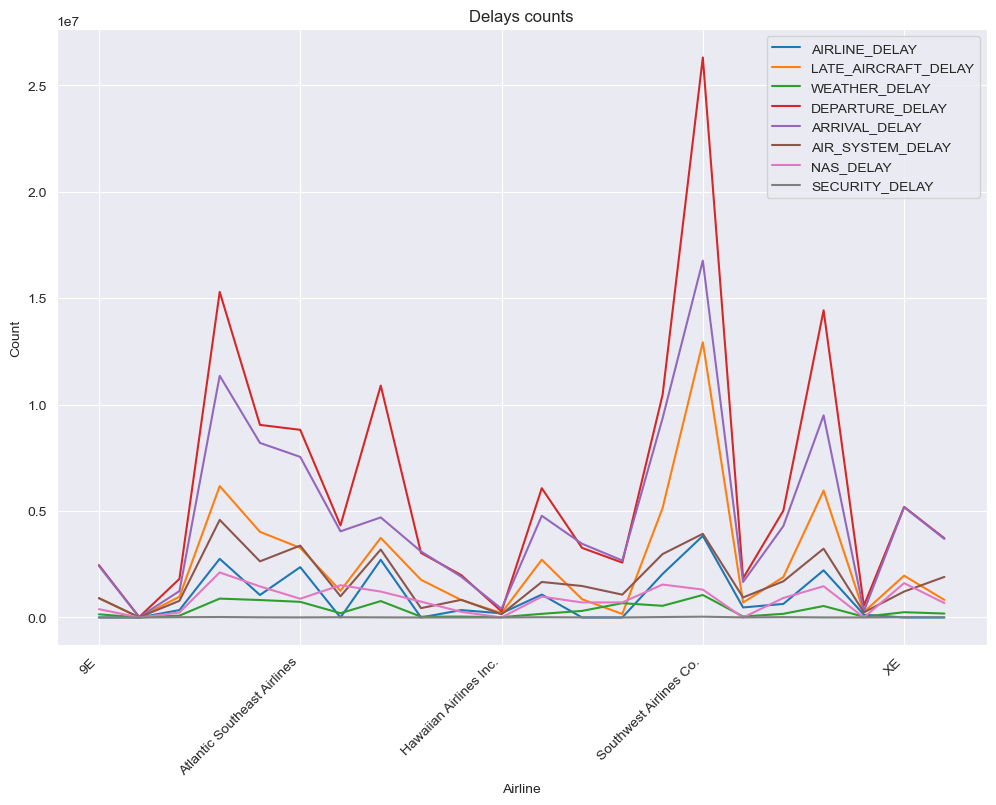

In [28]:
# Duration of delays of different causes on airlines.

airline= fl_eda.groupby("AIRLINE")[["AIRLINE_DELAY","LATE_AIRCRAFT_DELAY",'WEATHER_DELAY', 'DEPARTURE_DELAY','ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY','NAS_DELAY','SECURITY_DELAY']].sum()

airline.plot(kind='line',figsize=(12, 8))
plt.title('Delays counts')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()             


Airline delays are mostly as a result of airline departure delays, arrival delays and late aircraft delays. Airline security delays contributes the least to airline delays.

<Axes: title={'center': 'WEATHER_DELAY vrs DISTANCE'}, xlabel='Distance', ylabel='Weather delay'>

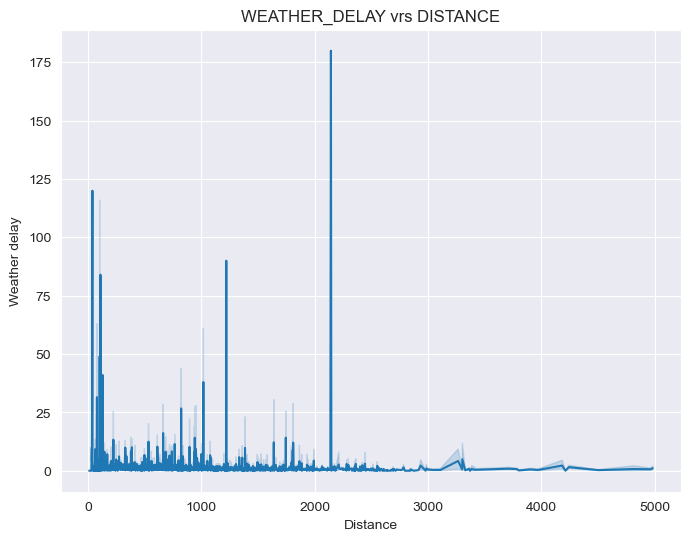

In [29]:
# Weather delay vs distance

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('WEATHER_DELAY vrs DISTANCE')
plt.xlabel('Distance')
plt.ylabel('Weather delay')
sns.lineplot(y='WEATHER_DELAY',x='DISTANCE', data= fl_eda)

Weather delay is caused by extreme or hazardous weather conditions that are forecasted at point of departure, enroute, or on arrival. From the chart, long distances have a longer hours of weather delay.

<Axes: title={'center': 'ELAPSED TIME vrs DISTANCE'}, xlabel='Distance', ylabel='Elapsed_time'>

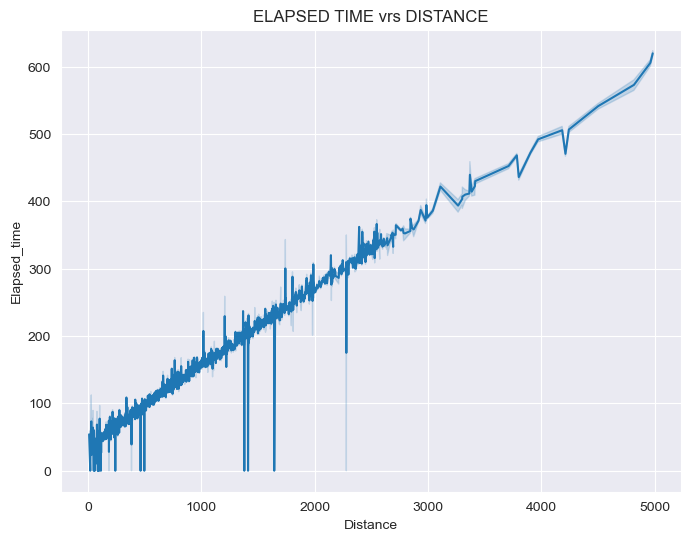

In [30]:
# Checking if distance correlates with elapsed time as it should

fig,ax = plt.subplots(figsize= (8, 6))
plt.title('ELAPSED TIME vrs DISTANCE')
plt.xlabel('Distance')
plt.ylabel('Elapsed_time')
sns.lineplot(y='ELAPSED_TIME',x='DISTANCE', data= fl_eda)

The flight distance is used to calculate the flight time. It therefore not surprising to find that the Elapsed time correlates with flight distance.

In [31]:
#Dropping catergorical columns before feature correlations is visualised with heatmap

drop_cols = fl_eda.drop(columns= ['ORIGIN_AIRPORT','DESTINATION_AIRPORT','name','type','iso_region','iso_country','id' ,'AIRLINE','ident','TAIL_NUMBER','FLIGHT_NUMBER','CANCELLATION_REASON'], axis =1)
drop_cols.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,SCHEDULED_DEPARTURE,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ELAPSED_TIME,SCHEDULED_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF,WHEELS_ON,AIRLINE_DELAY,latitude_deg,longitude_deg,elevation_ft
0,2008,1,3,4,2003,1955,2211.0,2225,128.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.070984,-74.933685,11.0
1,2008,1,3,4,754,735,1002.0,1000,128.0,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.704020,-101.473910,3435.0
2,2008,1,3,4,628,620,804.0,750,96.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.947735,-151.692520,450.0
3,2008,1,3,4,1829,1755,1959.0,1925,90.0,90.0,...,0.0,0.0,0.0,32.0,0.0,0.0,0.0,34.864800,-86.770300,820.0
4,2008,1,3,4,1940,1915,2121.0,2110,101.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.093290,-156.456700,80.0


Correlation between various features


<Axes: >

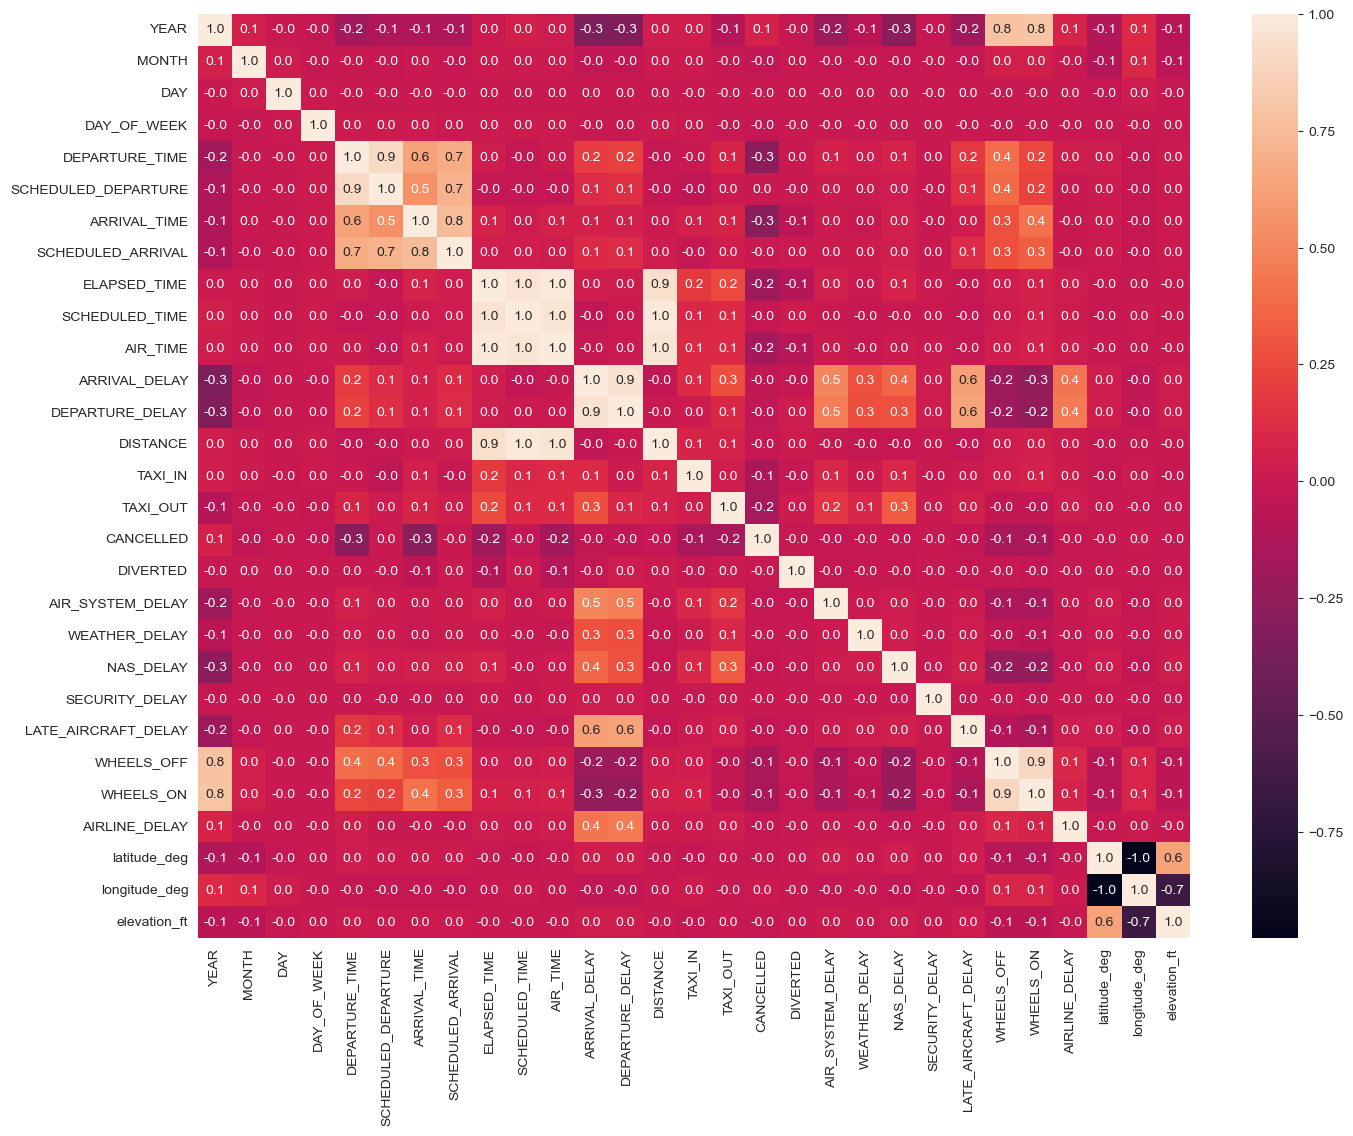

In [32]:
# Heatmap

corr = drop_cols.corr()
plt.figure(figsize=(16,12))
print('Correlation between various features')
sns.heatmap(corr, annot=True, fmt=".1f")

From the heatmap, strong correlations were noted when correlations are equal or greater than 0.5. These relationships were found between:

1. Departure time, scheduled departure, arrival time and scheduled arrival
2. Elapsed time, air time and scheduled time
3. Arrival delays and departure delays
4. Air system delay, arrival delay and departure delay
5. Late aircraft delay , arrival and departure delay
6. Distance and Elapsed time
7. Wheels off and Wheels on
8. Year, wheels off and wheels on
9. Latitude, longitude and elevation_ft

** SUMMARY**

The EDA stage of the flight cancellation project revealed that distribution of most of the features were right skewed. 
The inital part of the EDA focued on using visualizations to explore the meaning of features in the dataset. Features like Elapsed Time, Scheduled time and air time seemed to have similar meaning but the data in these columns were not the same. Scheduled time, though closely related to air time from the dataset showed some differences which was indicative of delay.
Wheel on and wheel off times were also explored. Visualizing with line plots showed that Wheel on times increased significantly in 2015 compared to 2008. Wheel on time which refers to the time an aircraft touches down on the runway at the airport and  Wheel off time which refers to the time the aircrafts wheels leave the runway of an airport we though to be closely related to Arrival time and Departure time features respectively.However, using lineplot to analyse these features carefully showed that:

1. Wheels off time is usually a few minutes before departure time. Which is a relistic finding because the departure time usually set after to the time after the aircraft tyres leaves the airport and this time comes later than the time the tyres of the aircraft leaves the airports runway.
However, from the line plot, as departure time increases, wheels off time tends to decrease . This may be due to the length of the airports runways due to the airports elevation from ground or the size of the airport. Aircraft wheels may leave the runway but still be in the vicinity of the airport.

2. Initial wheels on time is hours ahead of arrival time when the plane is stationary.As arrival time increases however, wheels on time lags.  This is because the arrival time is calculated as the time the aircrafts gets to the gate, so the wheels touch the runway first before the plane moves to the gate.Depending on the distance from the runway to the gate, the time difference between the wheels on time and arrival will be differ. 

The two graphs indicate that wheels off and wheel on times is not the same as departure and arrival time.

Using EDA, the difference between scheduled arrival and arrival time as well as scheduled departure and departure time was also investigated. It was found that scheduled times do not correspond to the real times in the dataset.

Arrival delay was also plotted against departure delay and it was found that arrival delay is positively correlated to departure delay. However, arrival delays are not always a consequence of departure delays and vice versa.

It was then established that there were delays in the dataset and the next stage was to accertain times when delays were recorded. Using multiple scatter plots, it is evident that:
a. 
More departure delays and arrival delays were recorded in 2008 than in 2015b. .
Nas_delays were observed mostly in 2008. Delays that are within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume and air traffic controd. l.
February and April were the months that recorded longest Departure delays and arrival delays.This may be because more passengers were returning from new year celebrations and in April passengers were going on summer holidae. ys.
Long weather delays were experienced in December because its winter sef. ason
Long airline delays were observed on January and Aug. gust.
Long security delays were observed on Septembeh. r, 9th
Late aircraft delays were observed on almost all months except Ji. anuary.
Security delays were commonly oberved in 2015 tha

The monthly cancelled flights were also investigated using a bar plot. The results showed that more flights were cancelled in November, January and February. This may be due to harsh winter weather conditions. Airlines responsible for the most flight cancellations had a cancellation rate of 3.5% and was American Eagle Airlines Inc.

There were eight types of delays in the dataset and each of these delays were analysed. It was showed using multiple lineplots that Security delays which is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas was more likely to cause flight cancellation than any other delay.
Weather delays were also more likely to cause flight cancellaton

With respect to the most visited airports,Hartsfield Jackson Atlanta International Airport was the most visited origin and destination airport.
The location and structure of airports was very essential in preventing delays and subsequent flight cancellations. Airports with high elevation affects airline performance in may ways. The increased elevation means these airports have increased run way distances which also means increased landing distances due to reduced air density. This property of airports makes it difficult for landing and takeoff and may leads to departure delays and arrival delays. Pilots must carefully calculate takeoff and landing distances as well as adjust their approach and departure procedures to ensure safe operations at high elevation airports.
The most elevated airport was fouind to be Pioneers Memorial Hospital Heliport.

Analysing delays caused by airlines like the air system delays, airline delays,late aircraft delays, NAS_ delay,departure delay, diverted and arrival delays revealed that:

i.  The airline with the most Air system delays was YV whereas Hawaiian Airlines Inc had the least air system delay.
ii.  Air system delays were responsible for about 140,000 departure delays abd 100,000 arrival delays.
iii.  AQ airlines has the most diverted flights where as Hawaiian Airlines Inc were the least diverted flights.
iv.  Diverted flights are  mostly cause departure delays 
v.  Southwest Airlines Co. has the most patronised flights.
vi.  Airline delays are mostly as a result of airline departure delays, arrival delays and late aircraft delays. Airline security delays contributes the least to airline delays.


The flight distance is used to calculate the flight time and this was proven when Elapsed time showed strong correlation to distance. Long distances were also shown to contribute to weather delay.

The final stage of EDA constituted construction of a heatmap, to further reveal relationships between features. Strong correlations were noted when correlations are equal or greater than 0.5. These relationships were found between:
1. 
Departure time, scheduled departure, arrival time and scheduled arriv
   a2. l
Elapsed time, air time and scheduled t
   i3. me
Arrival delays and departure de
   l4. ays
Air system delay, arrival delay and departure 
   d6. elay
Late aircraft delay , arrival and departure
     7. delay
Distance and Elape
    e8. d time
Wheels off and W
    h9. eels on
Year, wheels off and 
    w10. heels on
Latitude, longitude and elevation_fts.n in 2008

In [33]:
# Saved EDA dataset

fl_eda.to_csv('fl_eda.csv', sep=',')